In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings("ignore")
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import gutenberg as cg
# sentence tokeniser
from nltk.tokenize import word_tokenize as wt 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import textblob
import re
import spacy

In [5]:
df = pd.read_csv('../cleaned.csv')
df.head(5)

,cleaned,sentiment,sentiment_label_values
0,no thank you the new vaccine combines the expe...,negative,-1
1,scientificresearch safety and efficacy of dup...,neutral,0
2,dcp fireextinguisher for all classes kg kg kg ...,positive,1
3,rt discourse health news roundup vietnam repor...,neutral,0
4,health news roundup vietnam reports first case...,neutral,0


negative  = -1

neutral = 0

positive  = 1

In [23]:
criteria = (df.sentiment == 'neutral')|(df.sentiment == 'positive')
citeria_cols = ['cleaned','sentiment_label_values']

In [29]:
df_new = df.loc[criteria,citeria_cols]

df_new.sample(n=5, random_state=20)

,cleaned,sentiment_label_values
263,uk blind to new immune evasive covid variants ...,0
18,candice mcfield is an ace certified health coa...,1
876,reasons why to choose unicharts emr software ...,0
609,all can do in this world of government sanctio...,0
594,yes strange guess know the origins of the cam...,0


In [30]:
df_new.sentiment_label_values.value_counts()

0    606
1    175
Name: sentiment_label_values, dtype: int64

In [3]:
nlp = spacy.load("en_core_web_sm")

### **Playing with Genism**

In [36]:
import gensim as gm
import gensim.downloader as api

In [37]:
gm.__version__

'4.2.0'

In [43]:
# https://radimrehurek.com/gensim/downloader.html
api.info()  # return dict with info about available models/datasets

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [44]:
print(list(api.info()['models'].keys())) # returns a list of pretrained models

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [48]:
w2v = api.load('glove-twitter-50') # obtaining glove-twitter-50 pretained model 

[==================================================] 100.0% 199.5/199.5MB downloaded


In [49]:
type(w2v)

gensim.models.keyedvectors.KeyedVectors

In [106]:
w2v['apple']

0.51418

In [59]:
len(w2v['apple']) # vector size is 50

50

In [65]:
w2v.similarity('stick', 'tv') # The similarity is quite high due to the size of the model

0.44027632

In [71]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]

print("Similarity of pairs")
for index,words in enumerate(pairs):
    print(f"{words}: {w2v.similarity(words[0], words[1])}")

Similarity of pairs
('car', 'minivan'): 0.4821259677410126
('car', 'bicycle'): 0.619395911693573
('car', 'airplane'): 0.665248692035675
('car', 'cereal'): 0.3752760589122772
('car', 'communism'): 0.006416037678718567


In [75]:
pairs = [
    ('car', 'minivan'),   
    ('dante', 'vergil'),   
    ('sasuke', 'sakura'),  
    ('naruto', 'cereal'),    
    ('anime', 'naruto'),
]

print("Similarity of pairs")
for index,words in enumerate(pairs):
    print(f"{words}: {w2v.similarity(words[0], words[1])}")

Similarity of pairs
('car', 'minivan'): 0.4821259677410126
('dante', 'vergil'): 0.5784304738044739
('sasuke', 'sakura'): 0.6690869331359863
('naruto', 'cereal'): 0.24713319540023804
('anime', 'naruto'): 0.8038098812103271


In [83]:
topn = w2v.most_similar(positive=['anime','naruto'], topn=10)
print("Words close to anime and naruto\n")
for x in topn:
    print(x)

Words close to anime and naruto

('shippuden', 0.7954628467559814)
('comic', 0.7783275842666626)
('pokemon', 0.7670348286628723)
('dorama', 0.7638429403305054)
('cosplay', 0.761965811252594)
('conan', 0.7609164714813232)
('digimon', 0.7579272389411926)
('cartoon', 0.7569286227226257)
('manga', 0.7546569108963013)
('twilight', 0.7541415691375732)


In [100]:
def topn10(a:str,b:str,c):
    topn = w2v.most_similar(positive=[a,b], topn=c) 
    print(f"Words close to {a} and {b}\n")
    for x in topn:
        print(x)
topn10('anime','naruto',10) # Slot in yours and see the magic

Words close to anime and naruto

('shippuden', 0.7954628467559814)
('comic', 0.7783275842666626)
('pokemon', 0.7670348286628723)
('dorama', 0.7638429403305054)
('cosplay', 0.761965811252594)
('conan', 0.7609164714813232)
('digimon', 0.7579272389411926)
('cartoon', 0.7569286227226257)
('manga', 0.7546569108963013)
('twilight', 0.7541415691375732)


In [104]:
def does_not_match(a:str,b:str,c:str,d:str):
    does_not = w2v.doesnt_match([a,b,c,d]) 
    print(f"Word that does not match: {does_not}\n")
    
does_not_match('anime','naruto','iphone','manga') # Slot in yours and see the magic

Word that does not match: iphone



#### Semantic regularities captured in word embeeddings

In [109]:
from numpy import negative


def semantic_regularity(a:str,b:str,c:str,value):
    topn = w2v.most_similar(positive=[a,b],
                                negative=[c] ,topn=value) 

    print(f"Semantic regularities captured for {a} and {b} with {c}\n")
    for x in topn:
        print(x)

semantic_regularity('woman','african','man',10) # Slot in yours and see the magic

Semantic regularities captured for woman and african with man

('hispanic', 0.7835627198219299)
('indian', 0.7806853652000427)
('nigerian', 0.7688214182853699)
('kenyan', 0.7659406065940857)
('jewish', 0.7592188715934753)
('british', 0.7541263103485107)
('asian', 0.7488460540771484)
('egyptian', 0.7349568605422974)
('ethiopian', 0.729381263256073)
('traditional', 0.724597156047821)


In [153]:
words  = ['naruto','sasuke','shippuden', 'jet','airplane','fighter', 'sharingan']
words2 = ["one",'two','man','woman','table']

In [154]:
from sklearn.decomposition import PCA

words_vectors = np.array([w2v[word] for word in words])

print(words_vectors) # prints out a 30 array vector for each word

pca = PCA(n_components=3)
result = pca.fit_transform(words_vectors)
print(result)

[[-0.070857   0.23552   -0.63261   -0.41179   -0.56165    0.45893
   0.92275    0.79938   -0.43534    0.27582    1.0964     0.30782
  -1.6569    -0.13869   -0.58347   -1.1472     0.62851    0.3679
   0.11059    0.86531   -0.53664    0.93933    0.13442   -0.49563
   0.06157   -0.41277    0.11746   -0.15566    0.47074    0.26664
   0.45407   -0.66336    0.33258   -0.82128   -0.2192     0.050742
   0.026116  -2.3259     0.64201   -0.14358   -0.86378   -0.5247
  -0.48086   -0.22967   -0.35484    1.1862    -1.1699    -0.17047
   0.029668  -0.96375  ]
 [-0.4816     0.31767   -0.52721   -0.47308   -1.431      0.10926
  -0.024199   0.73802   -0.64241    0.10291    1.0367     0.22045
  -1.2572    -0.80745   -0.064654  -0.85647    0.36239   -0.15146
   0.26054    0.12358    0.50249    0.60541   -0.15722   -0.35545
  -0.089245   0.29621    0.31849   -0.054094   0.63705    0.19558
   0.50406   -0.59023    0.72132   -1.104     -0.34127    0.32893
   0.065274  -1.2639     0.34047    0.28617   -0.205

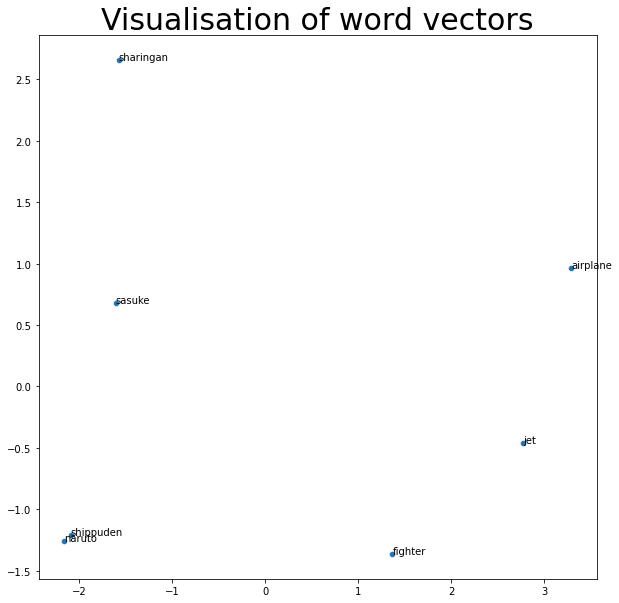

In [155]:
# https://balaji4u.medium.com/adding-annotations-to-seaborn-plots-5e5b134140c8
fig, ax = plt.subplots(figsize=(10,10))
scattered = sns.scatterplot(x=result[:,0],y=result[:,1])

for index,word in enumerate(words):
    # plt.annotate(word,xy=(result[index,0],result[index,1]))
    scattered.text(x=result[index,0],y=result[index,1],s=word)

ax.set_title("Visualisation of word vectors",fontdict={'fontsize':30})
plt.show()

**Using a function**

In [177]:
def decompose(word_list:list,n:int):
    words_vectors = np.array([w2v[word] for word in word_list])

    # print(words_vectors) # prints out a 30 array vector for each word

    pca = PCA(n_components=n)
    result = pca.fit_transform(words_vectors)
    # print(result)

    fig, ax = plt.subplots(figsize=(10,10))
    print(f"Components ranges from 0 -> {n-1}\nWhat pair of components would you like to visualise? ")
    a = input('Component one> ')
    b = input('Component two> ')
    scattered = sns.scatterplot(x=result[:,int(a)],y=result[:,int(b)])

    for index,word in enumerate(word_list):
        # plt.annotate(word,xy=(result[index,0],result[index,1]))
        scattered.text(x=result[index,int(a)],y=result[index,int(b)],s=word)

    ax.set_title(f"Visualisation of word vectors using components {a} and {b}",fontdict={'fontsize':15})
    plt.show()

Components ranges from 0 -> 1
What pair of components would you like to visualise? 


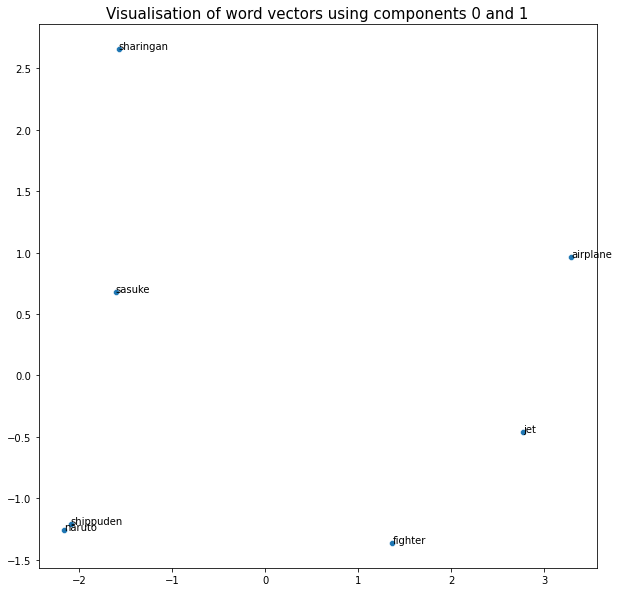

In [179]:
words  = ['naruto','sasuke','shippuden', 'jet','airplane','fighter', 'sharingan'] # Create your own list here
decompose(words,2) # Adjust the components as you wish

### **Main Project begins**

In [181]:
df_new.sample(n=5, random_state=20)

,cleaned,sentiment_label_values
263,uk blind to new immune evasive covid variants ...,0
18,candice mcfield is an ace certified health coa...,1
876,reasons why to choose unicharts emr software ...,0
609,all can do in this world of government sanctio...,0
594,yes strange guess know the origins of the cam...,0


In [187]:
# Vecctoriser of Word2vec
def sent_vec(sent):
    vector_size = w2v.vector_size
    w2v_resolution = np.zeros(vector_size)
    # print(w2v_resolution)
    ctr = 1
    for w in sent:
        if w in w2v:
            ctr += 1
            w2v_resolution += w2v[w]
    w2v_resolution = w2v_resolution/ctr
    # print(w2v_resolution)
    return w2v_resolution

In [191]:
# print(w2v_resolution)
# sent_vec('I am happy')

# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0.]

# print(w2v_resolution)
# sent_vec('I am rt')
# [ 1.17285801e-01  2.36872000e-01  1.34889985e-02  1.59179963e-02
#  -1.13233020e-01  1.47855802e-01 -5.97314006e-01  1.30345997e-01
#  -2.55153989e-02  7.84123942e-02 -1.01264798e-01 -2.85606407e-01
#  -2.97266002e+00 -5.88990018e-02 -2.71434003e-01  8.64960015e-02
#  -5.51510009e-01 -7.28605978e-02 -2.93007999e-01  1.15395601e+00
#   2.39560202e-01 -1.68011998e-01  2.98812002e-01  3.44634002e-01
#   3.38646039e-02 -1.20169601e+00 -4.27969997e-01  2.66880095e-03
#   1.98062199e-01  5.34468001e-01 -4.57480043e-02 -4.50438606e-01
#  -4.58119586e-03  1.50236595e-01  1.09260740e+00  3.37425789e-01
#  -1.59466004e-01 -3.95914003e-01 -2.61645804e-01  5.81587959e-02
#  -2.06474004e+00  2.18120039e-02  2.87938005e-01 -1.61962943e-01
#   1.11823802e-01 -9.43759978e-02  2.50666004e-01 -3.32066005e-01
#   3.05425805e-01 -6.06596005e-01]

#### **Preprocessing**

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS,'\n') # <- set of Spacy's default stop words
all_stopwords = STOP_WORDS

In [ ]:
# Removing several stop words
all_stopwords-= {'not',"no", "n't", 'n’t','n‘t','cannot','none','without','against'}
print('My stops\n',all_stopwords) # has been removed

In [194]:
stop = set(all_stopwords) # My own stop words

In [250]:
df_prep = df_new

In [263]:
len(df_prep.iloc[0,0])

178

In [251]:
df_prep.columns

Index(['cleaned', 'sentiment_label_values'], dtype='object')

In [279]:
def spacy_tokeniser(sent):
    sent = sent.strip().lower()
    doc = nlp(sent)
    mytokens = [word.lemma_ for word in doc if word not in stop]
    
    return mytokens

In [280]:
df_prep['tokens'] = df_prep['cleaned'].apply(spacy_tokeniser)

In [281]:
df_prep

,cleaned,sentiment_label_values,tokens
1,scientificresearch safety and efficacy of dup...,0,"[scientificresearch, safety, and, efficacy, of..."
2,dcp fireextinguisher for all classes kg kg kg ...,1,"[dcp, fireextinguisher, for, all, class, kg, k..."
3,rt discourse health news roundup vietnam repor...,0,"[rt, discourse, health, news, roundup, vietnam..."
4,health news roundup vietnam reports first case...,0,"[health, news, roundup, vietnam, report, first..."
6,what is the impact of covid health inequalitie...,0,"[what, be, the, impact, of, covid, health, ine..."
...,...,...,...
994,first though it should be pointed out that so...,0,"[first, though, it, should, be, point, out, th..."
996,americans are now more worried about their me...,0,"[americans, be, now, more, worried, about, the..."
997,if you are in need of covid resources the city...,0,"[if, you, be, in, need, of, covid, resource, t..."
998,fauci admit his lockdowns had negative consequ...,0,"[fauci, admit, his, lockdown, have, negative, ..."


In [284]:
# Vecctoriser of Word2vec
def sent_vec(sent):
    vector_size = w2v.vector_size
    w2v_resolution = np.zeros(vector_size)
    # print(w2v_resolution)
    ctr = 1
    for w in sent:
        if w in w2v:
            ctr += 1
            w2v_resolution += w2v[w]
    w2v_resolution = w2v_resolution/ctr
    # print(w2v_resolution)
    return w2v_resolution

In [285]:
# Vectorisation
df_prep['vectors'] = df_prep['tokens'].apply(sent_vec)

In [286]:
df_prep.sample(n=5, random_state=20)

,cleaned,sentiment_label_values,tokens,vectors
263,uk blind to new immune evasive covid variants ...,0,"[uk, blind, to, new, immune, evasive, covid, v...","[-0.13391756312921643, 0.12505631003296003, -0..."
18,candice mcfield is an ace certified health coa...,1,"[candice, mcfield, be, an, ace, certify, healt...","[0.0667203353209929, 0.24815800007094035, -0.0..."
876,reasons why to choose unicharts emr software ...,0,"[reason, why, to, choose, unichart, emr, softw...","[0.3896696869051084, 0.32698586978949606, -0.7..."
609,all can do in this world of government sanctio...,0,"[all, can, do, in, this, world, of, government...","[0.20534200086775753, 0.08435889261050357, 0.0..."
594,yes strange guess know the origins of the cam...,0,"[yes, strange, guess, know, the, origin, of, t...","[0.38429822943040304, 0.25917600135185886, 0.0..."


#### **The Model Development**

In [288]:
X = df_prep['vectors'].to_list()
y = df_prep['sentiment_label_values'].to_list()

In [291]:
len(X[0])

50

**Using PCA**

Text(0.5, 1.0, 'Using PCA for Feature Engineering')

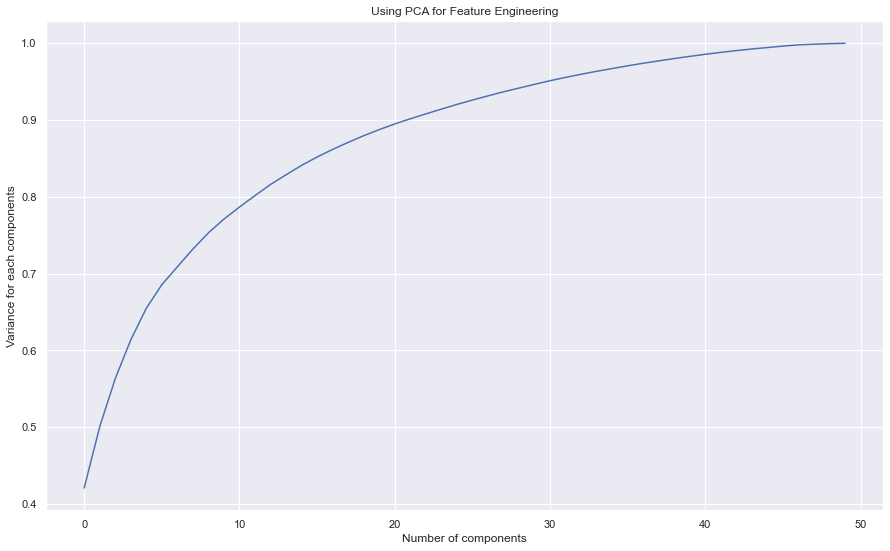

In [293]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
pca_data = pca.transform(X)

# plotting the cumulative summation of the explained variance
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize=(15,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance for each components')
ax.set_title("Using PCA for Feature Engineering")

In [294]:
exp_var_cumsum = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)

for index,var in enumerate(exp_var_cumsum):
    print(f'If pca components is: {index}    Variance: {np.around(var,3)}')

# .90 gives about 60 components which explains the data

If pca components is: 0    Variance: 42.06
If pca components is: 1    Variance: 50.03
If pca components is: 2    Variance: 56.3
If pca components is: 3    Variance: 61.36
If pca components is: 4    Variance: 65.47
If pca components is: 5    Variance: 68.55
If pca components is: 6    Variance: 70.87
If pca components is: 7    Variance: 73.18
If pca components is: 8    Variance: 75.3
If pca components is: 9    Variance: 77.1
If pca components is: 10    Variance: 78.66
If pca components is: 11    Variance: 80.15
If pca components is: 12    Variance: 81.6
If pca components is: 13    Variance: 82.86
If pca components is: 14    Variance: 84.09
If pca components is: 15    Variance: 85.18
If pca components is: 16    Variance: 86.17
If pca components is: 17    Variance: 87.09
If pca components is: 18    Variance: 87.95
If pca components is: 19    Variance: 88.75
If pca components is: 20    Variance: 89.49
If pca components is: 21    Variance: 90.16
If pca components is: 22    Variance: 90.8
If 

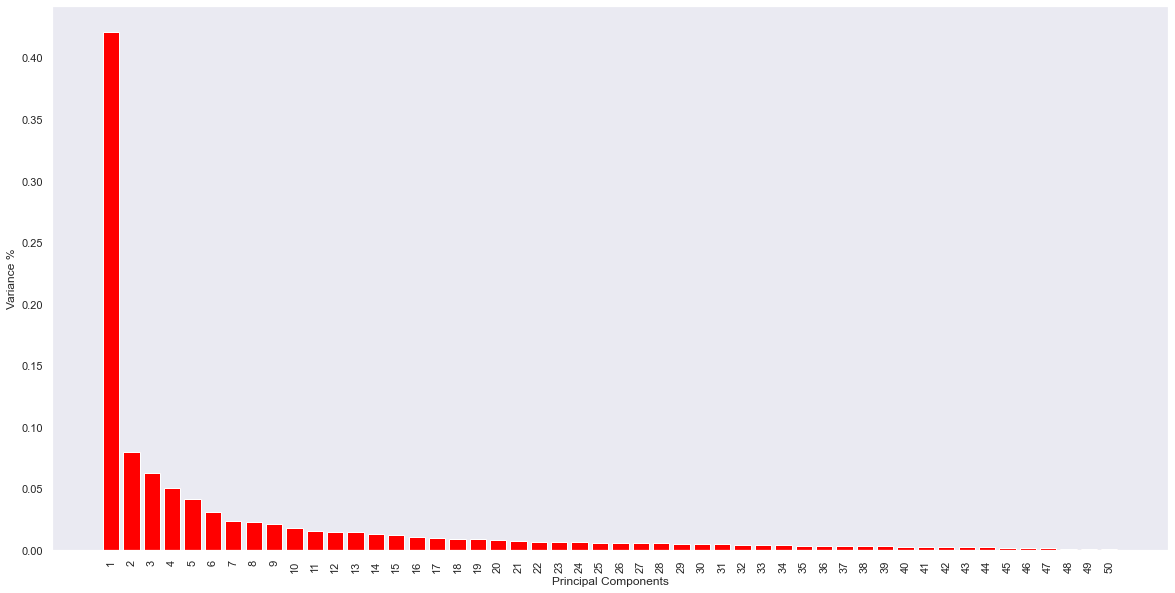

In [295]:
# Plotting the variances for each PC
fig = plt.subplots(figsize=(20,10))
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.xticks(rotation=1)
plt.ylabel('Variance %')
plt.xticks(PC,rotation=90)
plt.grid()

In [376]:
# from sklearn.model_selection import GridSearchCV,train_test_split,KFold,StratifiedShuffleSplit,\
#     StratifiedKFold
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,StratifiedShuffleSplit,StratifiedKFold
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import average_precision_score,roc_auc_score,plot_precision_recall_curve,plot_roc_curve

In [302]:
pipe1 = Pipeline([('pca',PCA(.90)),('clf',LogisticRegression())])

In [305]:
params_grid = {'clf__C':[0.0001,0.001,0.1,1,10,100],
              'clf__solver' :['sag','saga','lbfgs'],
              'clf__penalty':['l2','l1','elasticnet','none'],
              'clf__max_iter':[100,1000],
              'clf__random_state':[42,None]}

my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [306]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [307]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.9)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'clf__max_iter': [100, 1000],
                         'clf__penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'clf__random_state': [42, None],
                         'clf__solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc')

In [309]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__C': 10, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__random_state': 42, 'clf__solver': 'sag'}

Best estimator: Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 LogisticRegression(C=10, random_state=42, solver='sag'))])

Best validation score: 0.8169734904270987


In [340]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 LogisticRegression(C=10, random_state=42, solver='sag'))])

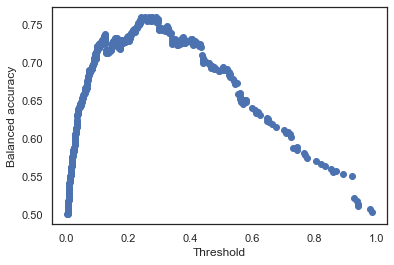

This is the optimal threshold: 0.25152219497561656


In [341]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       484
           1       0.42      0.76      0.54       140

    accuracy                           0.71       624
   macro avg       0.66      0.73      0.66       624
weighted avg       0.80      0.71      0.73       624



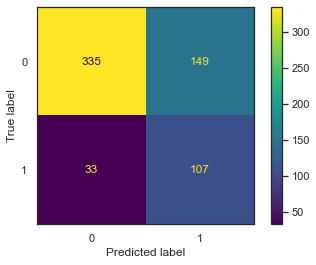

In [353]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0]

Average Precision: 0.37


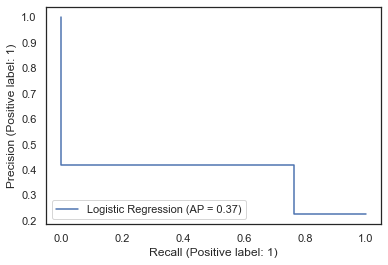

In [354]:
from sklearn.metrics import average_precision_score,roc_auc_score, PrecisionRecallDisplay,plot_roc_curve,RocCurveDisplay

# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="Logistic Regression",pos_label=1)

AUC score: 0.73


Text(0.5, 1.0, '2-class ROC curve for training:')

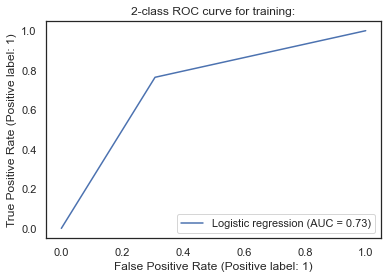

In [355]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='Logistic regression')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       122
           1       0.46      0.74      0.57        35

    accuracy                           0.75       157
   macro avg       0.68      0.74      0.69       157
weighted avg       0.81      0.75      0.76       157



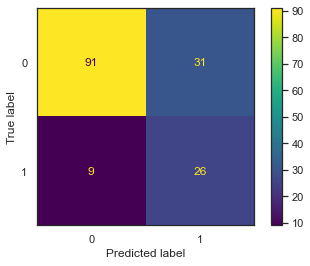

In [356]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.2
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [358]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
26 91 31 9



In [360]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.7459016393442623}

TPR (Sensitivity) is: 
{0.7428571428571429}

FPR is: 
{0.2540983606557377}

FNR is: 
{0.2571428571428571}

Precision is: 
{0.45614035087719296}


**Using Plotly**

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve

In [ ]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#### **The Confusion Matrix Explained**

**Specificity or True Negative Rate (TNR)**

TNR (ranges from 0 to 1, higher is better) measures the proportion of negatives that are correctly identified as such (e.g. the percentage of healthy people who are correctly identified as not having the condition).
TNR = TN/(TN+FP)

**Precision, Positive Predictive Value (PPV)**

PPV (ranges from 0 to 1, higher is better) is the ratio of true positives over all true and false positives:
Precision = TP/(TP+FP)
High precision means that an algorithm returned substantially more relevant results than irrelevant ones, or in other words the more likely everything it returns is right, but it does not mean it may get all the right results that are out there.


**Recall, Sensitivity, Hit Rate or True Positive Rate (TPR)**

TPR (ranges from 0 to 1, higher is better) is the ratio of true positives over the sum of true positives and false negatives:
Recall = TP / (TP+FN)
High recall means that an algorithm returned most of the relevant results, 
Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to avoid false negatives.

Precision, Positive Predictive Value (PPV) formula is given as:

$\ Precision = tp/tp+fp $

Recall, Sensitivity, Hit Rate or True Positive Rate (TPR) formula is given as: 

$\ Recall = tp/tp+fn $

Sensitivity/TPR formula is given as: 

$\ Sensitivity = tp/tp+fn $

Specificity or True Negative Rate (TNR) formula is given as: 

$\ Specificity = tn/tn+fp $

False Positive Rate (FPR) is given as:

$\ FPR = 1- Specificity = fp/fp+tn $

False Negative Rate (FNR) is given as:

$\ FNR = 1- Sensitivity = fn/tp+fn $


#### **Saving and exporting the Model**

In [374]:
import pickle
# Vectoriser
pickle.dump(w2v, open('w2v_vectoriser.pkl', 'wb'))

In [375]:
model = Pipeline([('pca',PCA(.90)),('clf',LogisticRegression(C=10, random_state=42, solver='sag'))])

model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model.pkl', 'wb'))

#### **Using KNN**

In [516]:
pipe1 = Pipeline([('pca',PCA(.90)),('clf',KNeighborsClassifier())])

In [517]:
params_grid = {'clf__n_neighbors':[3,4,5],
              'clf__p' :[1,2],
            #   'clf__weights' :['uniform', 'distance'],
                }

my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [518]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [519]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.9)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [3, 4, 5], 'clf__p': [1, 2]},
             scoring='roc_auc')

In [520]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__n_neighbors': 5, 'clf__p': 1}

Best estimator: Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf', KNeighborsClassifier(p=1))])

Best validation score: 0.7283505154639176


In [521]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf', KNeighborsClassifier(p=1))])

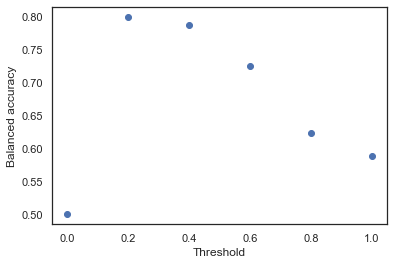

This is the optimal threshold: 0.2


In [522]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       484
           1       0.42      1.00      0.59       140

    accuracy                           0.69       624
   macro avg       0.71      0.80      0.67       624
weighted avg       0.87      0.69      0.72       624



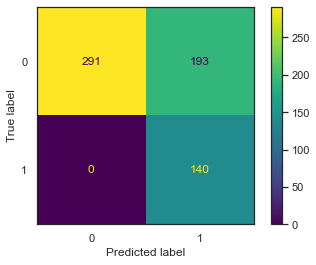

In [523]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0]

Average Precision: 0.42


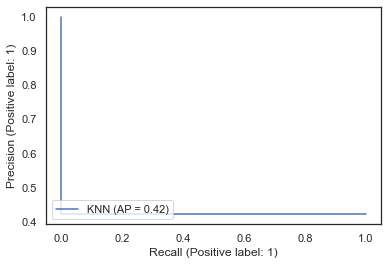

In [524]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="KNN",pos_label=1)

AUC score: 0.80


Text(0.5, 1.0, '2-class ROC curve for training:')

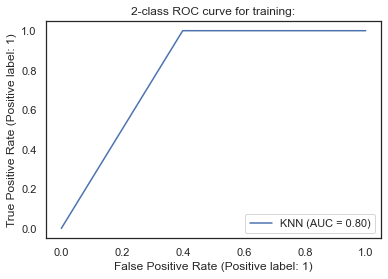

In [525]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='KNN')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.96      0.52      0.68       122
           1       0.36      0.91      0.51        35

    accuracy                           0.61       157
   macro avg       0.66      0.72      0.59       157
weighted avg       0.82      0.61      0.64       157



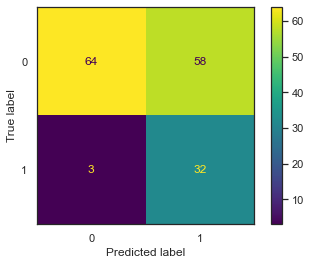

In [526]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.2
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [527]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
32 64 58 3



In [528]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.5245901639344263}

TPR (Sensitivity) is: 
{0.9142857142857143}

FPR is: 
{0.47540983606557374}

FNR is: 
{0.08571428571428572}

Precision is: 
{0.35555555555555557}


**Using Plotly**

In [529]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [530]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [531]:
model = Pipeline([('pca',PCA(.90)),('clf',KNeighborsClassifier(p=1,n_neighbors=5))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_knn.pkl', 'wb'))

#### **Using KNN without PCA**

In [590]:
pipe1 = Pipeline([('clf',KNeighborsClassifier())])

In [591]:
params_grid = {'clf__n_neighbors':[3,4,5],
              'clf__p' :[1,2],
            #   'clf__weights' :['uniform', 'distance'],
                }

my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [592]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [593]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [3, 4, 5], 'clf__p': [1, 2]},
             scoring='roc_auc')

In [594]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__n_neighbors': 5, 'clf__p': 1}

Best estimator: Pipeline(steps=[('clf', KNeighborsClassifier(p=1))])

Best validation score: 0.7512886597938145


In [595]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('clf', KNeighborsClassifier(p=1))])

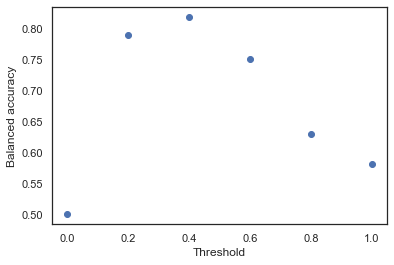

This is the optimal threshold: 0.4


In [596]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       484
           1       0.60      0.79      0.68       140

    accuracy                           0.83       624
   macro avg       0.77      0.82      0.78       624
weighted avg       0.86      0.83      0.84       624



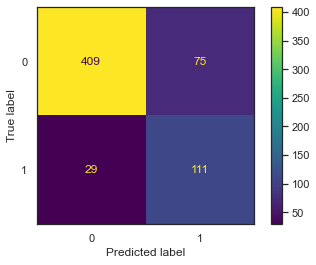

In [597]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.4
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

Average Precision: 0.52


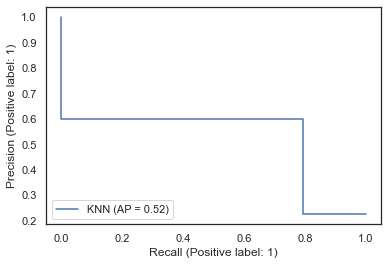

In [598]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.4
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="KNN",pos_label=1)

AUC score: 0.82


Text(0.5, 1.0, '2-class ROC curve for training:')

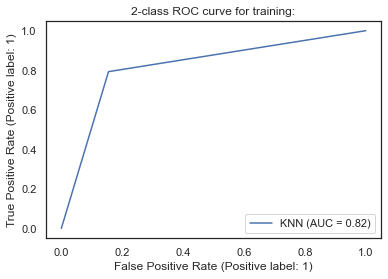

In [599]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='KNN')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       122
           1       0.40      0.60      0.48        35

    accuracy                           0.71       157
   macro avg       0.64      0.67      0.64       157
weighted avg       0.76      0.71      0.73       157



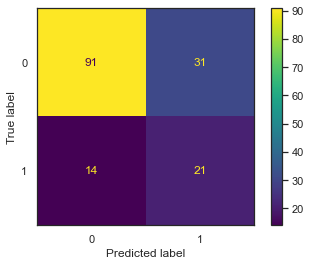

In [600]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.4
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [601]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
21 91 31 14



In [602]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.7459016393442623}

TPR (Sensitivity) is: 
{0.6}

FPR is: 
{0.2540983606557377}

FNR is: 
{0.4}

Precision is: 
{0.40384615384615385}


**Using Plotly**

In [603]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.4
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [604]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.4
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [605]:
model = Pipeline([('clf',KNeighborsClassifier(p=1,n_neighbors=5))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_knn_no_pca.pkl', 'wb'))

#### **Random Forest**

In [533]:
from sklearn.ensemble import RandomForestClassifier

In [534]:
pipe1 = Pipeline([('pca',PCA(.90)),('clf',RandomForestClassifier(random_state=42))])

In [536]:
params_grid = {'clf__max_depth':[3,4],
                # best can be used with features above 
                # 100, while random can be used for those below 100 features, 
                # it also reduces overfitting
                'clf__min_samples_split':[2,3,4,5],
                'clf__n_estimators':[10,100,200]
                
                
                } 
my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [537]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [538]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 4],
                         'clf__min_samples_split': [2, 3, 4, 5],
                         'clf__n_estimators': [10, 100, 200]},
             scoring='roc_auc')

In [539]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__max_depth': 4, 'clf__min_samples_split': 3, 'clf__n_estimators': 100}

Best estimator: Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        random_state=42))])

Best validation score: 0.8135861561119293


In [540]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        random_state=42))])

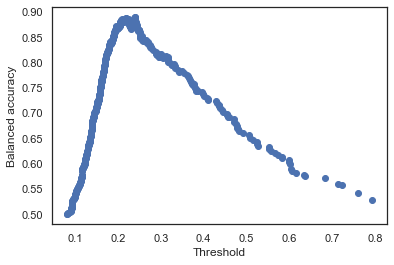

This is the optimal threshold: 0.2394596709085333


In [541]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       484
           1       0.57      0.94      0.71       140

    accuracy                           0.83       624
   macro avg       0.78      0.87      0.80       624
weighted avg       0.89      0.83      0.84       624



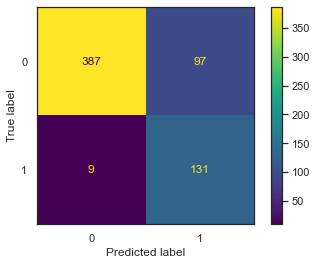

In [542]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0]

Average Precision: 0.55


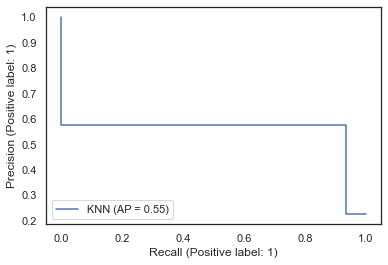

In [543]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.2
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="KNN",pos_label=1)

AUC score: 0.87


Text(0.5, 1.0, '2-class ROC curve for training:')

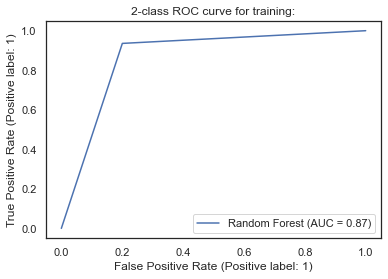

In [545]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='Random Forest')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       122
           1       0.47      0.80      0.60        35

    accuracy                           0.76       157
   macro avg       0.70      0.77      0.71       157
weighted avg       0.83      0.76      0.78       157



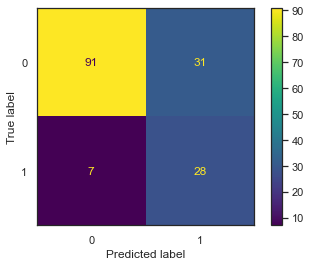

In [546]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.2
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [547]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
28 91 31 7



In [548]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.7459016393442623}

TPR (Sensitivity) is: 
{0.8}

FPR is: 
{0.2540983606557377}

FNR is: 
{0.2}

Precision is: 
{0.4745762711864407}


**Using Plotly**

In [549]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [550]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.2
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [551]:
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        random_state=42))])

In [552]:
model = Pipeline([('pca',PCA(.90)),('clf',RandomForestClassifier(max_depth=4, 
                                        min_samples_split=3,
                                        random_state=42))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_rf.pkl', 'wb'))

#### **Random Forest without PCA**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [553]:
pipe1 = Pipeline([('clf',RandomForestClassifier(random_state=42))])

In [571]:
params_grid = {'clf__max_depth':[3,4],
                # best can be used with features above 
                # 100, while random can be used for those below 100 features, 
                # it also reduces overfitting
                'clf__min_samples_split':[2,3,4,5],
                'clf__n_estimators':[10,100,150,200]
                
                
                } 
my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [573]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [574]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 4],
                         'clf__min_samples_split': [2, 3, 4, 5],
                         'clf__n_estimators': [10, 100, 150, 200]},
             scoring='roc_auc')

In [575]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__max_depth': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

Best estimator: Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=42))])

Best validation score: 0.8229381443298969


In [576]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=42))])

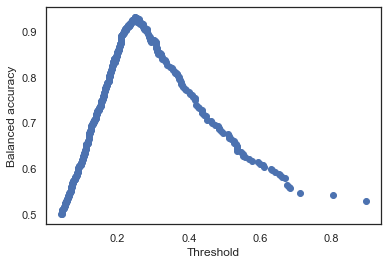

This is the optimal threshold: 0.25005986682187825


In [578]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       484
           1       0.78      0.94      0.85       140

    accuracy                           0.93       624
   macro avg       0.88      0.93      0.90       624
weighted avg       0.94      0.93      0.93       624



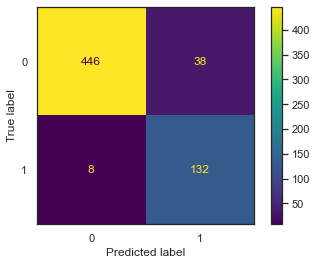

In [579]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.25
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]

Average Precision: 0.74


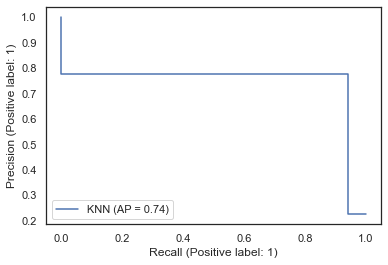

In [580]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.25
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="KNN",pos_label=1)

AUC score: 0.93


Text(0.5, 1.0, '2-class ROC curve for training:')

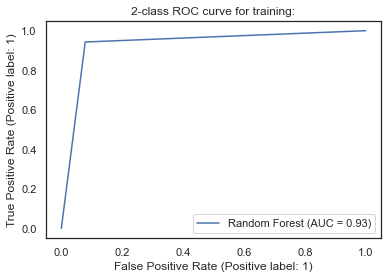

In [581]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='Random Forest')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       122
           1       0.51      0.63      0.56        35

    accuracy                           0.78       157
   macro avg       0.70      0.73      0.71       157
weighted avg       0.80      0.78      0.79       157



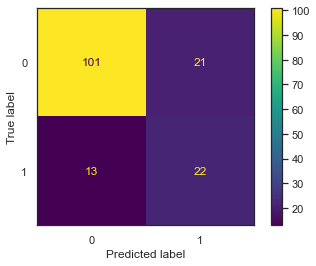

In [582]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.25
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [583]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
22 101 21 13



In [584]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.8278688524590164}

TPR (Sensitivity) is: 
{0.6285714285714286}

FPR is: 
{0.1721311475409836}

FNR is: 
{0.37142857142857144}

Precision is: 
{0.5116279069767442}


**Using Plotly**

In [585]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.25
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [586]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.25
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [587]:
mygrid_trainset

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=42))])

In [589]:
model = Pipeline([('clf',RandomForestClassifier(max_depth=4, 
                                        min_samples_split=3,
                                        n_estimators=200,
                                        random_state=42))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_rf_no_pca.pkl', 'wb'))

#### **Sampling for imbalanced dataset**

In [606]:
from collections import  Counter
from imblearn.under_sampling import RandomUnderSampler 

In [607]:
Counter(y)

Counter({0: 606, 1: 175})

In [617]:
rus = RandomUnderSampler(random_state=42,sampling_strategy=.9)
X_res, y_res = rus.fit_resample(X, y)
Counter(y_res)

Counter({0: 194, 1: 175})

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [618]:
# Vectorise before resampling
pipe1 = Pipeline([('clf',RandomForestClassifier(random_state=42))])

In [619]:
params_grid = {'clf__max_depth':[3,4],
                # best can be used with features above 
                # 100, while random can be used for those below 100 features, 
                # it also reduces overfitting
                'clf__min_samples_split':[2,3,4,5],
                'clf__n_estimators':[10,100,150,200]
                
                
                } 
my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [621]:
X_train, X_test, y_train,y_test= train_test_split(X_res,y_res,test_size=.2,random_state=42, stratify=y_res)

In [622]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 4],
                         'clf__min_samples_split': [2, 3, 4, 5],
                         'clf__n_estimators': [10, 100, 150, 200]},
             scoring='roc_auc')

In [623]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__max_depth': 4, 'clf__min_samples_split': 3, 'clf__n_estimators': 200}

Best estimator: Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        n_estimators=200, random_state=42))])

Best validation score: 0.815552995391705


In [624]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        n_estimators=200, random_state=42))])

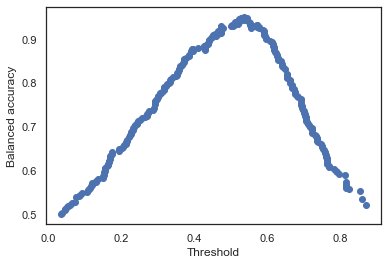

This is the optimal threshold: 0.5368322641123963


In [639]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       155
           1       0.98      0.91      0.94       140

    accuracy                           0.95       295
   macro avg       0.95      0.95      0.95       295
weighted avg       0.95      0.95      0.95       295



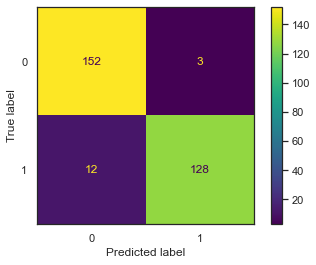

In [626]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.54
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0]

Average Precision: 0.93


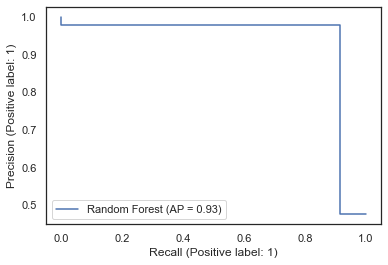

In [628]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.54
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="Random Forest",pos_label=1)

AUC score: 0.95


Text(0.5, 1.0, '2-class ROC curve for training:')

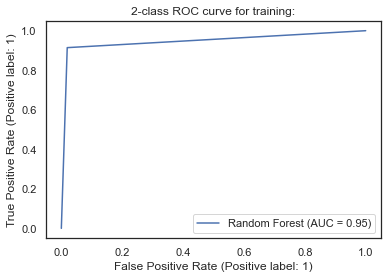

In [629]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='Random Forest')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        39
           1       0.70      0.66      0.68        35

    accuracy                           0.70        74
   macro avg       0.70      0.70      0.70        74
weighted avg       0.70      0.70      0.70        74



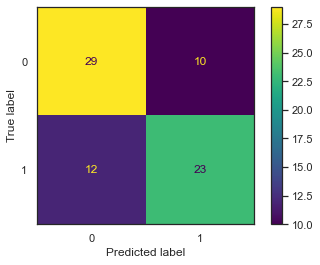

In [630]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.54
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [631]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
23 29 10 12



In [632]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.7435897435897436}

TPR (Sensitivity) is: 
{0.6571428571428571}

FPR is: 
{0.2564102564102564}

FNR is: 
{0.34285714285714286}

Precision is: 
{0.696969696969697}


**Using Plotly**

In [633]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.54
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [634]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.54
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [635]:
mygrid_trainset

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        n_estimators=200, random_state=42))])

In [636]:
model = Pipeline([('clf',RandomForestClassifier(max_depth=4, min_samples_split=3,
                                        n_estimators=200, random_state=42))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_rf_undersampler.pkl', 'wb'))

#### **Sampling for imbalanced dataset with PCA**

In [640]:
# Vectorise before resampling
pipe1 = Pipeline([('pca',PCA(n_components=.9)),('clf',RandomForestClassifier(random_state=42))])

In [641]:
params_grid = {'clf__max_depth':[3,4],
                # best can be used with features above 
                # 100, while random can be used for those below 100 features, 
                # it also reduces overfitting
                'clf__min_samples_split':[2,3,4,5],
                'clf__n_estimators':[10,100,150,200]
                
                
                } 
my_cv = StratifiedShuffleSplit(n_splits=10,test_size=.2,train_size=.8,random_state=42)
my_cv2 = StratifiedKFold(n_splits=10)

In [642]:
X_train, X_test, y_train,y_test= train_test_split(X_res,y_res,test_size=.2,random_state=42, stratify=y_res)

In [643]:
# Try to specify the scoring for the grid
mygrid = GridSearchCV(pipe1,param_grid=params_grid,cv=my_cv,scoring='roc_auc')
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=0.8),
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 4],
                         'clf__min_samples_split': [2, 3, 4, 5],
                         'clf__n_estimators': [10, 100, 150, 200]},
             scoring='roc_auc')

In [644]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__max_depth': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}

Best estimator: Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        n_estimators=150, random_state=42))])

Best validation score: 0.8063364055299539


In [645]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        n_estimators=150, random_state=42))])

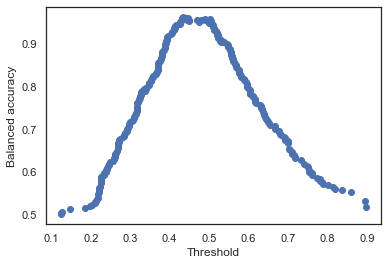

This is the optimal threshold: 0.43303954468092903


In [646]:
# Choosing the threshold
# https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
from sklearn.metrics import balanced_accuracy_score
y_threshold_value = mygrid_trainset.predict_proba(X_train)[:,1] 
# Optimizing the threshold is equivalent to optimize a 
# hyperparameter of your pipeline, so we do it only on the training dataset.
threshold = []
accuracy = []

for p in np.unique(y_threshold_value):
  threshold.append(p)
  y_pred_new = (y_threshold_value >= p).astype(int)
  # y_pred_new = (y_threshold_value > p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred_new))
  
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()
print(f"This is the optimal threshold: {threshold[np.argmax(accuracy)]}")

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       155
           1       0.93      0.99      0.96       140

    accuracy                           0.96       295
   macro avg       0.96      0.96      0.96       295
weighted avg       0.96      0.96      0.96       295



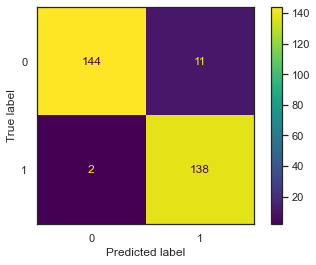

In [647]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)
y_pred_train

# 1 is automatic, automatic is the target variable 

y_pred_lower_threshold = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.43
y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_lower_threshold)

Checking Uncertainties: 
[0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0]

Average Precision: 0.92


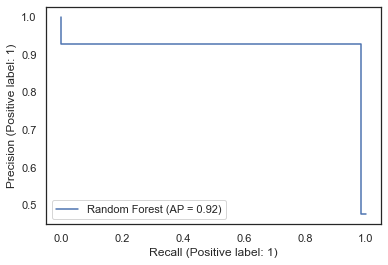

In [648]:
# Precision-recall
y_predict_proba_train = mygrid_trainset.predict_proba(X_train)[:,1] >= 0.43
print("Checking Uncertainties: \n{}\n".format((y_predict_proba_train[:100]).astype(int)))

average_precision = average_precision_score(y_train,y_predict_proba_train)
print("Average Precision: {:.2f}".format(average_precision))

disp = PrecisionRecallDisplay.from_predictions(y_train,y_predict_proba_train,name="Random Forest",pos_label=1)

AUC score: 0.96


Text(0.5, 1.0, '2-class ROC curve for training:')

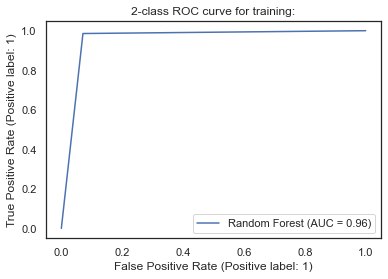

In [649]:
roc_scoring = roc_auc_score(y_train,y_predict_proba_train)
print("AUC score: {:.2f}".format(roc_scoring))

disp = RocCurveDisplay.from_predictions(y_train,y_predict_proba_train,name='Random Forest')
plt.title("2-class ROC curve for training:")

**Test data**

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       0.66      0.77      0.71        35

    accuracy                           0.70        74
   macro avg       0.71      0.71      0.70        74
weighted avg       0.71      0.70      0.70        74



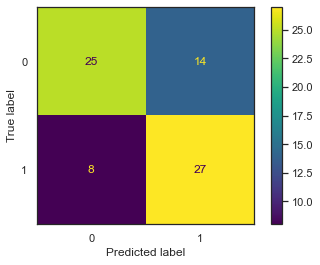

In [650]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_test = y_test
y_predict_proba_test = mygrid.predict_proba(X_test)[:,1] >= 0.43
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid,y_test,y_predict_proba_test)

In [651]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict_proba_test).ravel()
print("The tp,tn,fp,fn respectively: \n{} {} {} {}\n".format(tp,tn,fp,fn))

The tp,tn,fp,fn respectively: 
27 25 14 8



In [652]:
print("TNR (Specificity) is: \n{}\n".format({tn/(tn+fp)}))
print("TPR (Sensitivity) is: \n{}\n".format({tp/(tp+fn)}))
print("FPR is: \n{}\n".format({fp/(fp+tn)}))
print("FNR is: \n{}\n".format({fn/(tp+fn)}))
print("Precision is: \n{}".format({tp/(tp+fp)}))

TNR (Specificity) is: 
{0.6410256410256411}

TPR (Sensitivity) is: 
{0.7714285714285715}

FPR is: 
{0.358974358974359}

FNR is: 
{0.22857142857142856}

Precision is: 
{0.6585365853658537}


**Using Plotly**

In [653]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.43
fpr,tpr, thresholds = roc_curve(y_test,y_predict_proba_test)
auc_score = roc_auc_score(y_test,y_predict_proba_test)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC= {auc_score:.2f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type ='line',line=dict(dash='dash'),
    x0=0,x1=1,y0=0,y1=1
)

fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [654]:
# y_predict_proba = mygrid.predict_proba(X_test)[:,1]
y_predict_proba_test = mygrid_trainset.predict_proba(X_test)[:,1] >= 0.43
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_proba_test)
average_precision = average_precision_score(y_test,y_predict_proba_test)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AP= {average_precision:.2f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)



fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [655]:
mygrid_trainset

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        n_estimators=150, random_state=42))])

In [656]:
model = Pipeline([('pca', PCA(n_components=0.9)),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        n_estimators=150, random_state=42))])



model.fit(X_train,y_train)
pickle.dump(model, open('w2v_model_rf_undersampler_pca.pkl', 'wb'))